## K Nearest Neighbours

In [17]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import itertools
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report,confusion_matrix
from training_and_testing_data import X_trainset, X_testset, Y_trainset, Y_testset
from sklearn.neighbors import KNeighborsClassifier

In [19]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_trainset,Y_trainset)
    yhat=neigh.predict(X_testset)
    mean_acc[n-1] = metrics.accuracy_score(Y_testset, yhat)

    
    std_acc[n-1]=np.std(yhat==Y_testset)/np.sqrt(yhat.shape[0])

mean_acc

array([0.62593752, 0.62812204, 0.66504041, 0.66984636, 0.68637588,
       0.68673997, 0.6961334 , 0.69831792, 0.70348795])

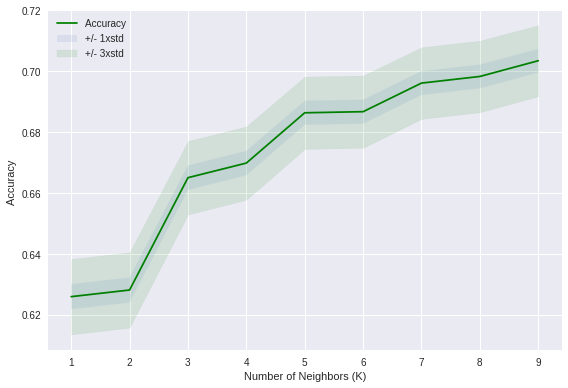

In [20]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [21]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.7034879487366198 with k= 9


In [5]:
k = 9
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_trainset,Y_trainset)

In [8]:
y_hat = neigh.predict(X_testset)

In [9]:
print(confusion_matrix(Y_testset,y_hat))
print(classification_report(Y_testset,y_hat))

[[4967 1971]
 [2101 4694]]
             precision    recall  f1-score   support

          0       0.70      0.72      0.71      6938
          1       0.70      0.69      0.70      6795

avg / total       0.70      0.70      0.70     13733



In [10]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [11]:
cnf_matrix = confusion_matrix(Y_testset, y_hat)


Confusion matrix, without normalization
[[4967 1971]
 [2101 4694]]


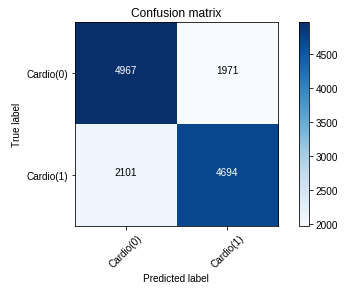

In [12]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Cardio(0)','Cardio(1)'],normalize= False,  title='Confusion matrix')
plt.style.use("seaborn")